<a href="https://colab.research.google.com/github/Ravenha/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Bethany_Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

In [0]:
# Import libraries
import pandas as pd
import requests
import urllib.request
import time
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.decomposition import PCA
from collections import OrderedDict
from datetime import date
from requests import get
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup
from itertools import groupby
from math import sqrt
from numpy import linalg as LA
from mpl_toolkits import mplot3d
from numpy.linalg import matrix_rank
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mlxtend.plotting import category_scatter

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

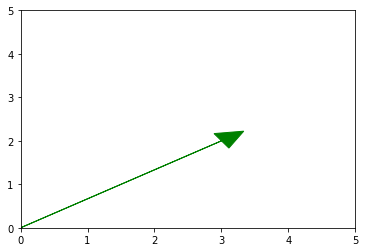

In [0]:
plt.arrow(0,0,3,2, head_width = .4, head_length = .4, color= 'g')
plt.xlim(0,5)
plt.ylim(0,5);

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [0]:
b= np.array([17,-4,-2,1])
normb = np.linalg.norm(b)
print(normb)

17.60681686165901


the magnitude or extent of the vector in space

## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [0]:
c= np.array([3,7,-2,12])
d= np.array([9,-7,4,6])
cd = np.dot(c,d)
print(cd)

42


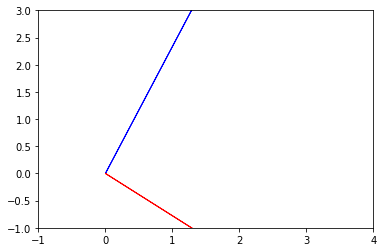

In [0]:
c = np.array([3,7,-2,12])
d = np.array([9,-7,4,6])

plt.arrow(0,0,dx=c[0],dy=c[1], color='blue')
plt.arrow(0,0,dx=d[0],dy=d[1], color='red')
plt.xlim(-1,4)
plt.ylim(-1,3)
plt.show()

They are not orthogonal

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [0]:
E = np.mat('7,4,2;1,3,-1;2,6,-4')
invE = np.linalg.inv(E)
Etrans = E.T
print(invE)

[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]


In [0]:
print(Etrans)

[[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [0]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [0]:
df.describe()

,customers,snow
count,7.000000,7.000000
mean,1135.714286,2.714286
std,314.264069,2.927700
min,760.000000,0.000000
25%,905.000000,0.500000
50%,1080.000000,1.000000
75%,1350.000000,5.000000
max,1600.000000,7.000000


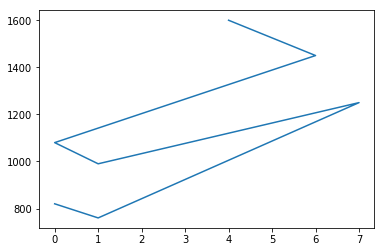

In [0]:
plt.plot(df['snow'],df['customers']);

In [0]:
print('mean: \n',df.describe().mean())

mean: 
 customers    893.997294
snow           3.267748
dtype: float64


In [0]:
print('Std: \n',df.describe().std())

Std: 
 customers    526.488848
snow           2.797023
dtype: float64


In [0]:
print('Std2:\n',np.std(df,ddof=1))

Std2:
 customers    314.264069
snow           2.927700
dtype: float64


In [0]:
print('Var:\n',np.var(df,ddof = 1))

Var:
 customers    98761.904762
snow             8.571429
dtype: float64


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [0]:
print(np.var(df['customers'],ddof=1))
print(np.var(df['snow'],ddof = 1))

98761.90476190478
8.571428571428571


The variances do not look the same.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [0]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [0]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [0]:
new = df.drop('Country', axis=1)
new.head()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [0]:
data = new
scaler = StandardScaler()
print(scaler.fit(data))
StandardScaler(copy=True, with_mean=True, with_std=True)
print(scaler.mean_)
X2 =pd.DataFrame(scaler.transform(data), columns = new.columns)
X2.describe()

StandardScaler(copy=True, with_mean=True, with_std=True)
[  94.25  245.25  706.    130.5   205.25  154.25  798.25  208.    457.75
  202.    349.    967.5  1502.5    57.5  1427.    360.75   55.25]


,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
count,4.000000,4.000000,4.000000,4.000000,4.000000e+00,4.000000e+00,4.000000,4.000000e+00,4.000000,4.000000,4.000000e+00,4.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000,4.000000e+00
mean,0.000000,0.000000,0.000000,0.000000,6.938894e-18,-5.551115e-17,0.000000,5.551115e-17,0.000000,0.000000,-5.551115e-17,0.000000,6.938894e-18,-5.551115e-17,-2.775558e-17,0.000000,5.551115e-17
std,1.154701,1.154701,1.154701,1.154701,1.154701e+00,1.154701e+00,1.154701,1.154701e+00,1.154701,1.154701,1.154701e+00,1.154701,1.154701e+00,1.154701e+00,1.154701e+00,1.154701,1.154701e+00
min,-1.729885,-1.277169,-1.483121,-1.464967,-1.097071e+00,-1.137656e+00,-1.335847,-1.247006e+00,-1.283054,-1.260994,-1.098378e+00,-1.609137,-8.555755e-01,-1.090266e+00,-1.404236e+00,-1.663384,-1.576656e+00
25%,-0.030617,-0.489873,-0.565440,-0.615286,-7.485897e-01,-6.900536e-01,-0.671519,-8.441271e-01,-0.693036,-0.567447,-9.336213e-01,-0.445460,-6.971356e-01,-6.230090e-01,-6.774824e-01,-0.337098,-4.978915e-01
50%,0.535805,-0.122468,0.142132,0.156263,-2.194142e-01,-2.051511e-01,-0.007190,7.673883e-02,-0.059314,-0.126099,-3.661260e-02,0.339920,-4.119437e-01,-2.595871e-01,1.067548e-01,0.410780,3.042670e-01
75%,0.566422,0.367405,0.707572,0.771549,5.291754e-01,4.849025e-01,0.664329,9.208660e-01,0.633722,0.441348,8.970087e-01,0.785380,2.851918e-01,3.634219e-01,7.842372e-01,0.747878,8.021585e-01
max,0.658275,1.522105,1.198856,1.152440,1.535899e+00,1.547958e+00,1.350227,1.093528e+00,1.401682,1.513193,1.171603e+00,0.929297,1.679463e+00,1.609440e+00,1.190727e+00,0.841823,9.681224e-01


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [0]:
pca = PCA(n_components=2)
pca.fit(X2)
print(pca.explained_variance_ratio_) 
print(pca.singular_values_)  

[0.68327871 0.24871288]
[6.81637385 4.1124781 ]


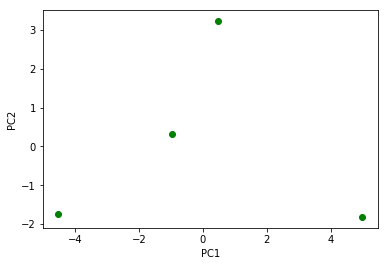

In [0]:
x = pd.DataFrame(pca.transform(X2),columns =['PC1','PC2'])
plt.scatter(x['PC1'],x['PC2'],color = 'g')
plt.xlabel('PC1')
plt.ylabel('PC2');

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [0]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [0]:
data = points
scaler = StandardScaler()
print(scaler.fit(data))
StandardScaler(copy=True, with_mean=True, with_std=True)
print(scaler.mean_)
scale_point=pd.DataFrame(scaler.transform(data), columns = points.columns)
scale_point.head()

StandardScaler(copy=True, with_mean=True, with_std=True)
[-2.32329816 -3.42286901]


,x,y
0,-1.215264,0.000286
1,-0.270846,-0.621863
2,0.468740,-1.122373
3,-0.897263,-0.323537
4,0.334265,-1.128378


In [0]:
data = scale_point
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
clus = pd.DataFrame(kmeans.fit_transform(data), columns = scale_point.columns)
clus.head()

,x,y
0,2.417662,1.049977
1,2.228975,0.129167
2,2.476443,0.982140
3,2.372675,0.601800
4,2.504045,0.869419


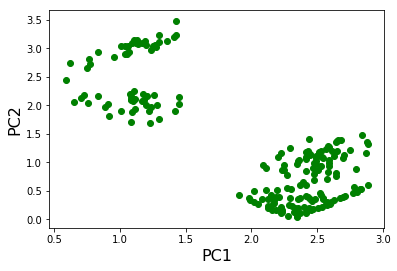

In [0]:
centers = kmeans.cluster_centers_
plt.scatter(clus['x'],clus['y'],c='g' )
plt.xlabel('PC1', fontsize=16)
plt.ylabel('PC2', fontsize=16)
plt.show()

In [0]:
centroids = points.sample(2)
centroids.head()

,x,y
100,-2.797716,-8.559481
32,-0.090369,-7.642283


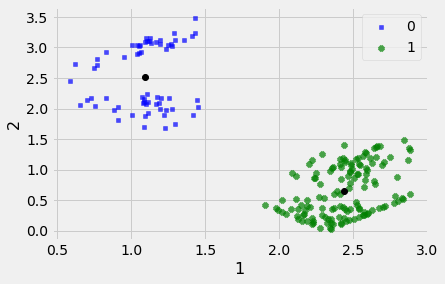

In [0]:
clus['cluster'] = kmeans.labels_
centro = clus.groupby('cluster').mean()

fig = category_scatter(data=clus,
                       x = 'x', 
                       y = 'y', 
                       label_col = 'cluster', legend_loc=True)

for cent in centro.iterrows():
    plt.plot(cent[1][0], cent[1][1], "ok")

plt.xlabel('1', fontsize=16)
plt.ylabel('2', fontsize=16)
plt.show()